In [1]:
import src as SOGA
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Case 1 
The first experiments are kinda like the ones from SEFM paper.

However, the prior is the same for all people in the database (gauss(465000, 100000)).
The prior is chosen to be equal for all since an attacker might know the average for an entire population.

But the "actual" values in the database are sampled from different distributions, since there might be differences between age groups in real life.

male2130 = gauss(465000,100000 )
male3140 = gauss(475000,100000 )
male4150 = gauss(485000,100000 )
male5160 = gauss(495000,100000 )
female2130 = gauss(460000,100000 )

We have 3 different scenarios with gradually more information for the attacker to observe
Scenario 1: Average for poluation
Scenario 2: Average for poluation + average for males
Scenario 3: Average for poluation + average for males + average for male 21-30

For each scenario we plot the posterior of the age group 21-30 (We coould also plot posterior for other age groups?)
We also plot all the actual values as lines. Blue lines are values from people in age group 21-30 and black lines for everyone else.



In [10]:
compiled_case_1_exp1 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment1.soga')
cfg_case_1_exp1 = SOGA.produce_cfg(compiled_case_1_exp1)
output_dist_case_1_exp1 = SOGA.start_SOGA(cfg_case_1_exp1)

In [12]:
compiled_case_1_exp2 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment2.soga')
cfg_case_1_exp2 = SOGA.produce_cfg(compiled_case_1_exp2)
output_dist_case_1_exp2 = SOGA.start_SOGA(cfg_case_1_exp2)

In [15]:
compiled_case_1_exp3 =SOGA.compile2SOGA('programs/SOGA/Privug/rasmus/Case1/experiment3.soga')
cfg_case_1_exp3 = SOGA.produce_cfg(compiled_case_1_exp3)
output_dist_case_1_exp3 = SOGA.start_SOGA(cfg_case_1_exp3)

In [35]:
#The acutal sampled values:
meanm2130 = [553663., 433856., 713989., 471166., 435411., 745048., 577540., 540576., 442278., 504165.] 
meanm3140 = [429254., 565260., 490365., 568815., 446628., 417811., 403353., 618130., 454271., 444181.] 
meanm4150 = [612930., 486621., 535591., 584664., 467942., 593904., 577935., 366869., 614758., 676634.] 
meanm5160 = [421815., 619666., 723055., 498242., 540499., 541263., 494399., 596725., 474274., 504156.] 
meanf2130 = [570584., 486264., 433134., 418759., 222708., 455372., 457377., 383811., 394170., 409574.]

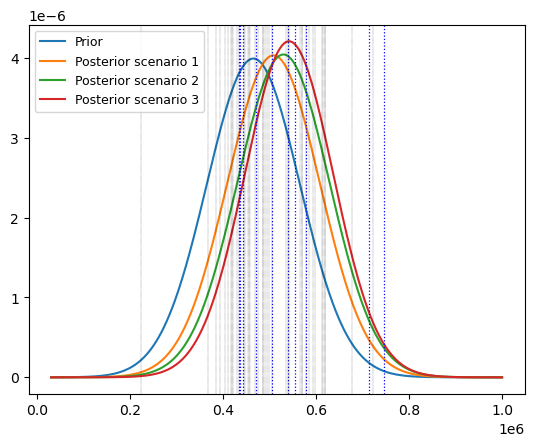

In [78]:
x = np.linspace(30000,1000000,500)

prior1 = norm.pdf(x, loc=465000, scale=100000)
posterior1 = output_dist_case_1_exp1.gm.marg_pdf(x, 0)

prior2 = norm.pdf(x, loc=465000, scale=100000)
posterior2 = output_dist_case_1_exp2.gm.marg_pdf(x, 0)

prior3 = norm.pdf(x, loc=465000, scale=100000)
posterior3 = output_dist_case_1_exp3.gm.marg_pdf(x, 0)

plt.plot(x, prior1, label='Prior')
plt.plot(x, posterior1, label='Posterior scenario 1')
plt.plot(x, posterior2, label='Posterior scenario 2')
plt.plot(x, posterior3, label='Posterior scenario 3')

w = 0.3
w2130 = 0.9
for val in meanm2130:
    plt.axvline( val, color="blue",linestyle = 'dotted',linewidth=w2130)
for val in meanm3140:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm4150:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanm5160:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)
for val in meanf2130:
    plt.axvline( val, color="black",linestyle = 'dotted',linewidth=w)

plt.legend(loc="upper left",  fontsize="9")

### Calculating the effect sizes of the 3 cases
To calculate effect sizes we use Cohen's d (x1 - x2)/std where x1 is the mean of the prior and x2 is the mean of the posteror and std is the standard deviation of the posterior

In [70]:
#Scenario 1
print(f'effect size case 1: {(465000 - output_dist_case_1_exp1.gm.mean()[0])/np.sqrt(output_dist_case_1_exp1.gm.cov()[0][0])}')
#Scenario 2
print(f'effect size case 2: {(465000 - output_dist_case_1_exp2.gm.mean()[0])/np.sqrt(output_dist_case_1_exp2.gm.cov()[0][0])}')
#Scenario 3
print(f'effect size case 3: {(465000 - output_dist_case_1_exp3.gm.mean()[0])/np.sqrt(output_dist_case_1_exp3.gm.cov()[0][0])}')



effect size case 1: -0.4382960977083031
effect size case 2: -0.655166921420285
effect size case 3: -0.8092184204966606


## Case 2 Create an outlier and see if the attack is worse for the outlier compared to other people. Increase outlier? 

## Case 4 varying group sizes. See if this also affects the outlier

## Case 3 Differential privacy. Try different epsilons and amount of noise (std) vs utility 